In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
path = '/content/wine.csv'
df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [32]:
df.shape

(6497, 13)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 독립변수 (x) : wine 속성
# 종속변수 (y) : 와인분류라벨(red/white wine)

df[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [34]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [35]:
#학습 셋, 테스트 셋
x_test, x_train, y_test, y_train = \
train_test_split(x, y, test_size=0.2, shuffle=True)

In [36]:
#모델 구조 설정

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#모델 컴파일

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
#모델 저장 설정 및 실행
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = '/content/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [39]:
#모델 실행

#train data의 25% >> validation_split = 0.25
history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1/50
1/2 [==============>...............] - ETA: 1s - loss: 1.1021 - accuracy: 0.7260
Epoch 1: val_loss improved from inf to 0.71976, saving model to /content/data/model/all/01-0.7600.hdf5
2/2 [==============================] - 1s 213ms/step - loss: 0.9546 - accuracy: 0.7487 - val_loss: 0.7198 - val_accuracy: 0.7600
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 0.7247 - accuracy: 0.7540
Epoch 2: val_loss did not improve from 0.71976
2/2 [==============================] - 0s 29ms/step - loss: 0.7412 - accuracy: 0.7292 - val_loss: 0.7568 - val_accuracy: 0.6462
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 0.7919 - accuracy: 0.6320
Epoch 3: val_loss improved from 0.71976 to 0.66808, saving model to /content/data/model/all/03-0.7323.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 0.7667 - accuracy: 0.6585 - val_loss: 0.6681 - val_accuracy: 0.7323
Epoch 4/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6573 - accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6471 - accuracy: 0.7560
Epoch 5: val_loss improved from 0.63489 to 0.63466, saving model to /content/data/model/all/05-0.7600.hdf5
2/2 [==============================] - 0s 47ms/step - loss: 0.6540 - accuracy: 0.7487 - val_loss: 0.6347 - val_accuracy: 0.7600
Epoch 6/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6943 - accuracy: 0.7280
Epoch 6: val_loss improved from 0.63466 to 0.60534, saving model to /content/data/model/all/06-0.7600.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.6446 - accuracy: 0.7487 - val_loss: 0.6053 - val_accuracy: 0.7600
Epoch 7/50
1/2 [==============>...............] - ETA: 0s - loss: 0.6250 - accuracy: 0.7420
Epoch 7: val_loss improved from 0.60534 to 0.56245, saving model to /content/data/model/all/07-0.7569.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.6080 - accuracy: 0.7487 - val_loss: 0.5625 - val_accuracy: 0.7569
Epoch 8/50
1/2 [===

In [40]:
#테스트 결과 출력

score = model.evaluate(x_test, y_test)
print('Test Dataset ACC: ', round(score[1]* 100, 2))

163/163 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9402
Test Dataset ACC:  94.02


In [41]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.954602,0.748718,0.719765,0.760000
1,0.741200,0.729231,0.756850,0.646154
2,0.766658,0.658462,0.668082,0.732308
3,0.678233,0.738462,0.634890,0.756923
4,0.653980,0.748718,0.634657,0.760000
5,0.644609,0.748718,0.605335,0.760000
6,0.607950,0.748718,0.562453,0.756923
7,0.566993,0.748718,0.537606,0.750769
8,0.542353,0.747692,0.527972,0.741538
9,0.528410,0.744615,0.502603,0.750769


In [42]:
hist_df = pd.DataFrame(history.history)


#val_loss, val_acc 변화

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

#x값을 지정, 검증용 셋의 오차 >> 빨간색 / 학습용 셋의 오차 >> 파란색

np.arange(len(y_loss))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

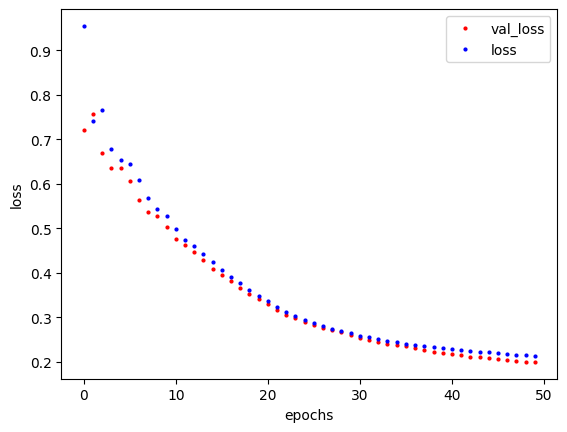

In [43]:
x_len = np.arange(len(y_loss)) # x_len >> epochs

plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='val_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='loss')

plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()


In [44]:
score = model.evaluate(x_test, y_test)
print('Test Dataset ACC: ', round(score[1]* 100, 2))

163/163 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9402
Test Dataset ACC:  94.02


In [46]:
# 교차 검증(KFold)
from sklearn.model_selection import KFold

k = 5

kfold = KFold(n_splits = k, shuffle=True)

# 정확도를 담을 그릇(리스트) 준비
acc_score = []

# 모델 구조 설정 함수
def model_fn():
    model = Sequential()
    model.add(Dense(30, input_dim=12, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# k 겹 교차 검증 이용, k번 학습 실행
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, batch_size=500, verbose=0)

    accuracy = model.evaluate(x_test, y_test)[1]
    acc_score.append(accuracy)

    # k번 실행된 정확도 평균 구하기
    avg_acc_score = sum(acc_score) / k

    # 결과 출력
    print('정확도: ', acc_score)
    print('kfold 정확도 평균', avg_acc_score)

41/41 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9385
정확도:  [0.9384615421295166]
kfold 정확도 평균 0.18769230842590331
41/41 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9454
정확도:  [0.9384615421295166, 0.9453846216201782]
kfold 정확도 평균 0.37676923274993895
41/41 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9592
정확도:  [0.9384615421295166, 0.9453846216201782, 0.9591993689537048]
kfold 정확도 평균 0.56860910654068
41/41 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9646
정확도:  [0.9384615421295166, 0.9453846216201782, 0.9591993689537048, 0.9645881652832031]
kfold 정확도 평균 0.7615267395973205
41/41 [==============================] - 0s 2ms/step - loss: 0.1307 - accuracy: 0.9546
정확도:  [0.9384615421295166, 0.9453846216201782, 0.9591993689537048, 0.9645881652832031, 0.9545804262161255]
kfold 정확도 평균 0.9524428248405457
